In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

Starting virtual X frame buffer: Xvfb.
env: DISPLAY=:1


### OpenAI Gym

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI gym comes into play. It's a python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:

In [3]:
import gym
env = gym.make("MountainCar-v0")

#plt.imshow(env.render('rgb_array'))
#print("Observation space:", env.observation_space)
#print("Action space:", env.action_space)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Note: if you're running this on your local machine, you'll see a window pop up with the image above. Don't close it, just alt-tab away.

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it ~~for now~~.

In [5]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.51844142  0.        ]


In [6]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the riht slightly (around 0.0005)

taking action 2 (right)
new observation code: [-0.5174801   0.00096132]
reward: -1.0
is game over?: False


### Play with it

Below is the code that drives the car to the right. 

However, it doesn't reach the flag at the far right due to gravity. 

__Your task__ is to fix it. Find a strategy that reaches the flag. 

You're not required to build any sophisticated algorithms for now, feel free to hard-code :)

_Hint: your action at each step should depend either on __t__ or on __s__._

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


<IPython.core.display.Javascript object>


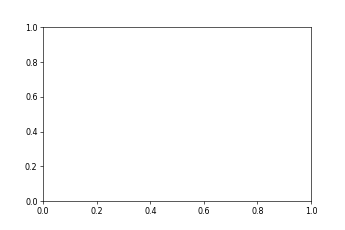

0 -0.48666068243048927
1 -0.4892232046990539
2 -0.49304308700695254
3 -0.4980918161704803
4 -0.5043316608911261
5 -0.5117159285213396
6 -0.5201892986296524
7 -0.5296882393693546
8 -0.5401415116710588
9 -0.5514707643760477
10 -0.5635912206683487
11 -0.5764124526970019
12 -0.5898392373326624
13 -0.6037724818655472
14 -0.6181102044569071
15 -0.6327485506462057
16 -0.6475828245092775
17 -0.6625085114184618
18 -0.6774222689457339
19 -0.6922228633384355
20 -0.7068120311344325
21 -0.7210952487123714
22 -0.7349823966487272
23 -0.7483883103737224
24 -0.7612332134556973
25 -0.7734430345800992
26 -0.7849496136451825
27 -0.795690806151379
28 -0.8056104980656242
29 -0.8146585455191512
30 -0.8207906550377048
31 -0.8239776082856821
32 -0.8242044793783685
33 -0.8214702125953106
34 -0.8157875919176375
35 -0.8071836046174607
36 -0.7957001719672806
37 -0.7813951906132605
38 -0.7643437982319752
39 -0.7446397474495932
40 -0.7223967443240842
41 -0.6977495847713097
42 -0.6708549079557081
43 -0.64189138424405

In [25]:

# create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

# prepare "display"
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(t): #push to left to gain momentum, then go right, fail, go left again, then finally succeed
    if t < 30 or (t > 70 and t < 100):
        return actions['left']
    else :
        return actions['right']


for t in range(TIME_LIMIT):
    
    s, r, done, _ = env.step(policy(t))
    #print(t, s[0])
    #draw game image on display
    ax.clear()
    #ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Well done!")
        break
else:    
    print("Time limit exceeded. Try again.")

### Submit to coursera

In [26]:
from submit import submit_interface
submit_interface(policy, 'kj316@cam.ac.uk', 'oEpNdpzh0P8St0rA')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Submitted to Coursera platform. See results on assignment page!
